This computation was originally done in Google Colab, and therefore our R was interpereted through python to allow us to mount a drive for storage of data and packages.

# Replicating Menon et al.

#### https://doi.org/10.1172/jci.insight.133267

We did not have the original code from *Single cell transcriptomics identifies focal segmental glomerulosclerosis remission endothelial biomarker*, so we replicated
the analysis described in the methods section of the paper. Our code produces a close match to the original study, and all slight differences between our final result
and theirs are documented below.

The data used here can be downloaded at [www.ncbi.nlm.nih.gov/geo](https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE140989&format=file&file=GSE140989%5FKPMP%5FPremiere%5Freference%5FSCT%5FNormalizeddata%2Etxt%2Egz),
and it is already processed with SCTransform.

In [ ]:
%reload_ext rpy2.ipython
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%%R
lib_loc <- "/content/drive/MyDrive/r-lib"
file_path <- '/content/drive/Shareddrives/Research - Stephen/Organized Files/Datasets/Menon/Data/SCTransformedData'

library(Seurat, lib = lib_loc)
library(harmony, lib = lib_loc)

matrix_txt <- read.delim(file_path)

sobj <- CreateSeuratObject(matrix_txt)
rm(matrix_txt)

sobj <- FindVariableFeatures(sobj)
sobj <- ScaleData(sobj)
sobj <- RunPCA(sobj)
sobj <- RunHarmony(sobj, "orig.ident")

R[write to console]: Calculating gene variances
R[write to console]: 

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]

The dimensionality of the data was not specified in the original paper, and so we systematically searched through dimensionalities to find the closest possible to the original UMAP. The best match was 21 dimensions, which is what we used here.

In [ ]:
%%R
sobj <- RunUMAP(sobj, dims = 1:21, reduction = 'harmony')
sobj <- FindNeighbors(sobj, dims = 1:21, reduction = 'harmony')

R[write to console]: 14:34:39 UMAP embedding parameters a = 0.9922 b = 1.112

R[write to console]: 14:34:39 Read 22264 rows and found 21 numeric columns

R[write to console]: 14:34:39 Using Annoy for neighbor search, n_neighbors = 30

R[write to console]: 14:34:39 Building Annoy index with metric = cosine, n_trees = 50

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: 

The resolution for clustering was given in the paper.

In [ ]:
%%R
sobj <- FindClusters(sobj, resolution = 1.75)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 22264
Number of edges: 828330

Running Louvain algorithm...


R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: 

Maximum modularity in 10 random starts: 0.8649
Number of communities: 32
Elapsed time: 5 seconds


Here is the original UMAP from the paper:

*(Adapted from Menon et al.)*







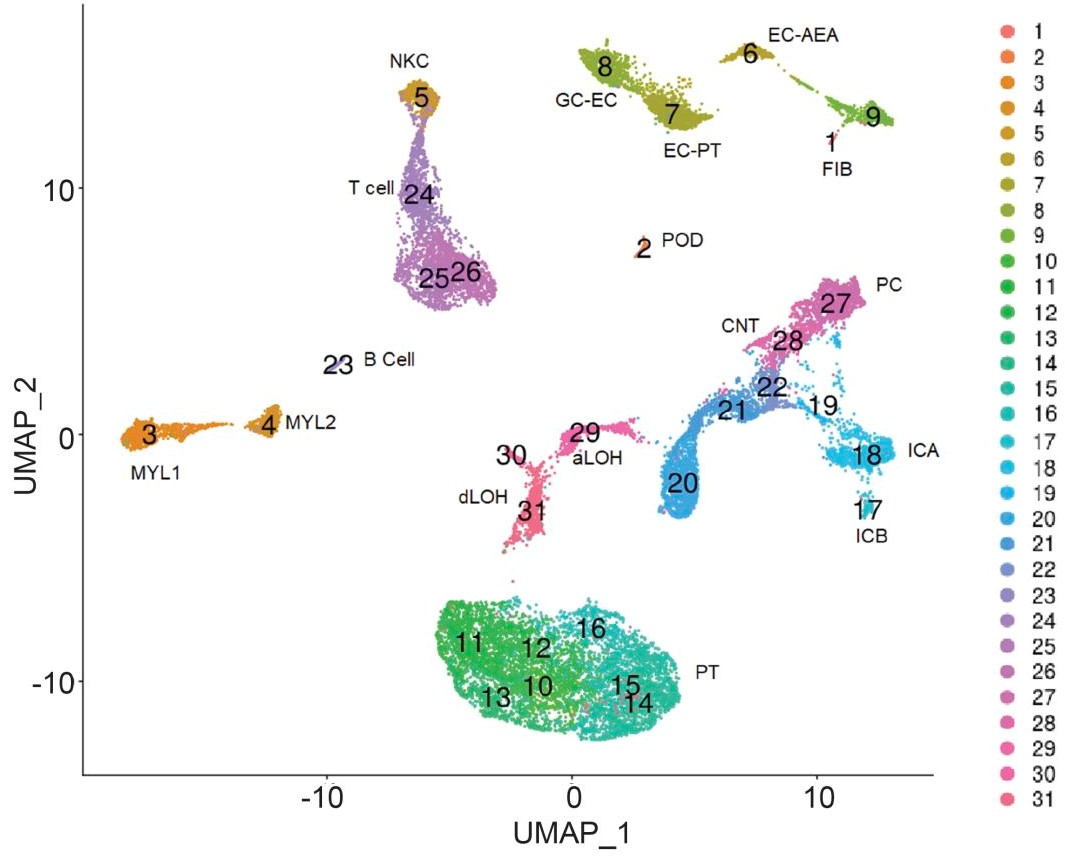

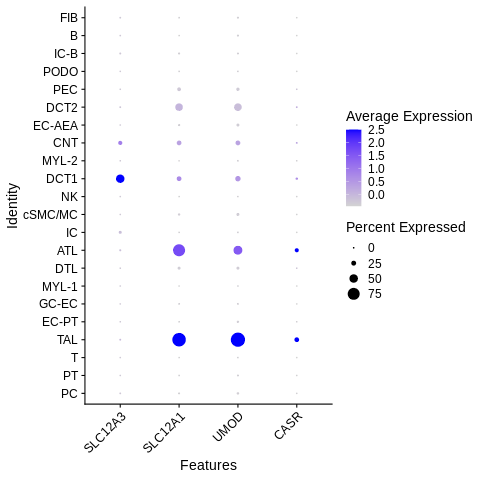

In [ ]:
%%R
DotPlot(sobj, features = c('SLC12A3', 'SLC12A1', 'UMOD', 'CASR'
)) + RotatedAxis()

In [ ]:
%%R
markers <- FindMarkers(sobj, ident.1 = 'DCT2')
markers

R[write to console]: For a more efficient implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the limma package
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('limma')
--------------------------------------------
After installation of limma, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session



  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=01m 38s
                      p_val  avg_logFC pct.1 pct.2     p_val_adj
DEFB1         2.474072e-178  1.3036264 0.942 0.356 5.361315e-174
PPP1R1A       2.591127e-162  0.5938937 0.456 0.079 5.614971e-158
DUSP9         1.049200e-136  0.4661305 0.429 0.079 2.273617e-132
MPC1          2.413606e-110  0.8221201 0.704 0.303 5.230284e-106
COX6B1        7.500421e-110  0.7812625 0.957 0.752 1.625341e-105
COX5B         5.921398e-107  0.8271174 0.935 0.748 1.283167e-102
COX8A         5.283092e-103  0.8030349 0.930 0.725  1.144846e-98
CHCHD10        1.984028e-94  0.7709930 0.882 0.561  4.299389e-90
FXYD2          2.122649e-93  1.1861937 0.982 0.710  4.599781e-89
COX7B          3.983283e-92  0.8647550 0.870 0.652  8.631775e-88
UQCRB          3.146702e-89  0.7771696 0.925 0.769  6.818903e-85
CKB            4.792306e-87  0.6540702 0.617 0.234  1.038493e-82
ATP5J          2.003029e-85  0.7399883 0.827 0.593  4.340563e-81
S100A6        

In [ ]:
%%R
DimPlot(sobj, label = TRUE) + NoLegend()

We found one more cluster than the original study, but it appeared to be a trivial subsetting of the T cluster, and we combined it with the adjacent T cells below.

Now, we annotated our clusters based on the biomarkers from the dot plot in the original paper.

Here is the original dot plot: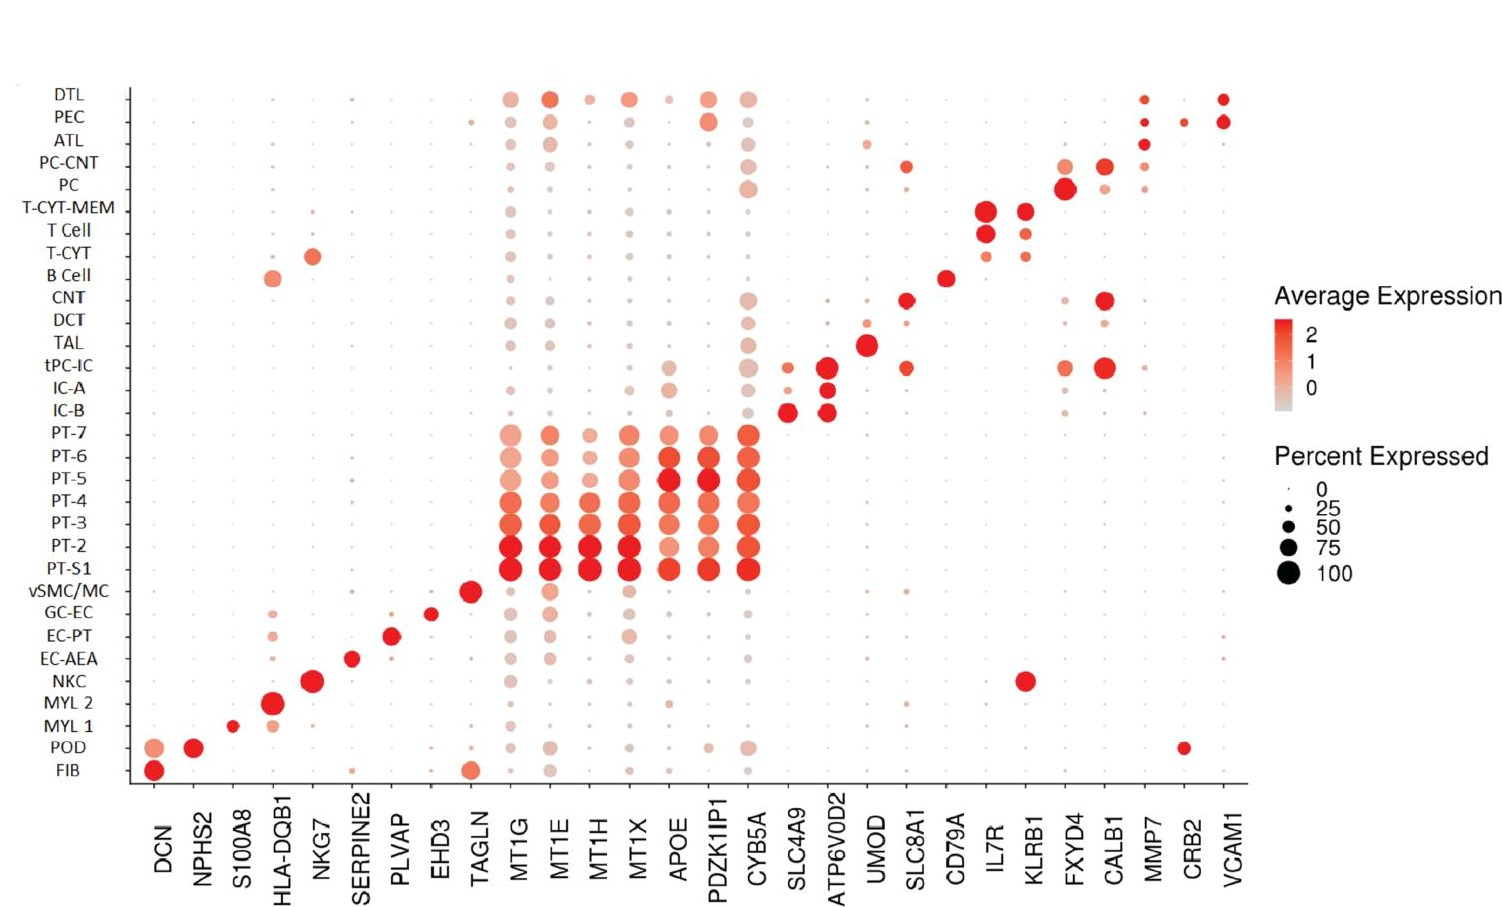

Here is our series of dot plots using the same genes:

*(They are split here to ensure correct rendering)*

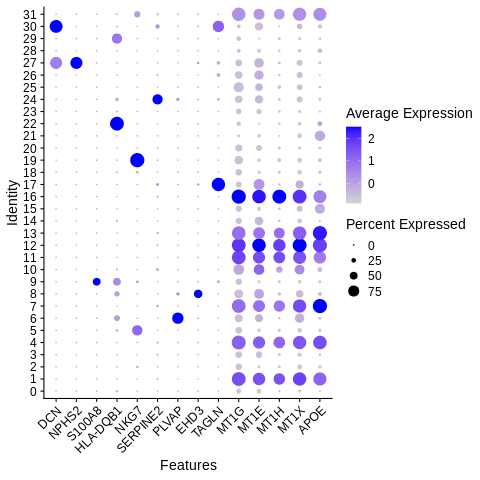

In [ ]:
%%R
DotPlot(sobj, features = c('DCN', 'NPHS2', 'S100A8', 'HLA-DQB1','NKG7','SERPINE2','PLVAP','EHD3','TAGLN', 'MT1G','MT1E','MT1H','MT1X','APOE','PDZ1IP1'
)) + RotatedAxis()

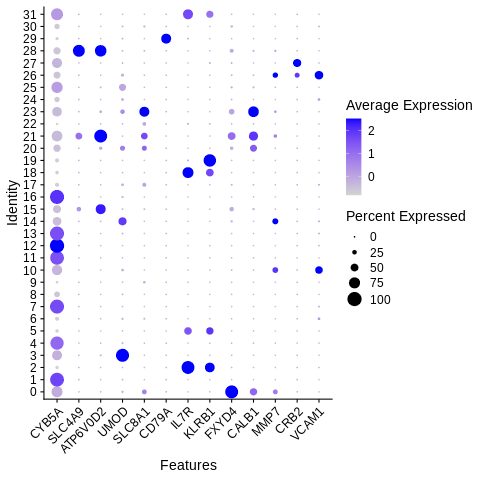

In [ ]:
%%R
DotPlot(sobj, features = c('CYB5A','SLC4A9','ATP6V0D2','UMOD','SLC8A1','CD79A','IL7R','KLRB1','FXYD4','CALB1','MMP7','CRB2','VCAM1')) + RotatedAxis()

Our dot plots were a good match for theirs, so our clusters are now annotated in the same way.

In [ ]:
%%R
nn <- c('PC','PT','T','TAL','PT','T','EC-PT','PT','GC-EC','MYL-1','DTL','PT','PT','PT','ATL','IC','PT','cSMC/MC','T','NK','DCT','IC','MYL-2','CNT','EC-AEA','DCT','PEC','PODO', 'IC-B','B','FIB','T')
length(nn)
names(nn) <- levels(sobj)
sobj <- RenameIdents(sobj, nn)

And visualized here:

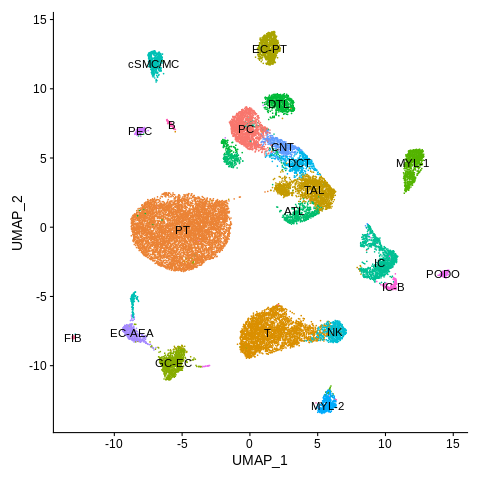

In [ ]:
%%R
DimPlot(sobj, label = 'TRUE') + NoLegend()

Note there are 5 adjustments in our analysis from the original.



1.   The transitioning principle cells (tPC-IC) are grouped with intercalated cells type A (IC-A). This was done because we found the number of tPC-IC did not match the number in the original paper well, but the combination of tPC-IC and IC-A in our analysis was a good match for the equivalent combination in the original. All intercalated cells are eventually funneled into the same intercalated category in our downstream ontology, and therefore this has no impact on the end result. The accuracy of the assignment was confirmed in the below dot plots. 

2.   Our cortical connecting tubule principal cells grouped with the other principal cells. They have all been labeled principal cells here, and as can be seen in our downstream analysis, we will end up combining all principal cells into a single ontology term later. 

3.   All of the distinct proximal tubule clusters from the original paper are combined into a single proximal tubule category.

4.   While our T cell subsets were a good match for the original paper, we combined them all into the T cell category in our ontology and therefore grouped them together here.

5.  The distal convouted tubule cells split into two clusters, as shown by the umap and number of cells in each category. We put them back together into a single category here. 



This is a table with the counts of the number of cells in each celltype, and a similar table can be found in the original paper for comparison. Note they are not an identical match, but close enough that we accepted the results.

In [ ]:
table(Idents(sobj))

NameError: ignored

This is the original table:

*(Adapted from Menon et al.)*

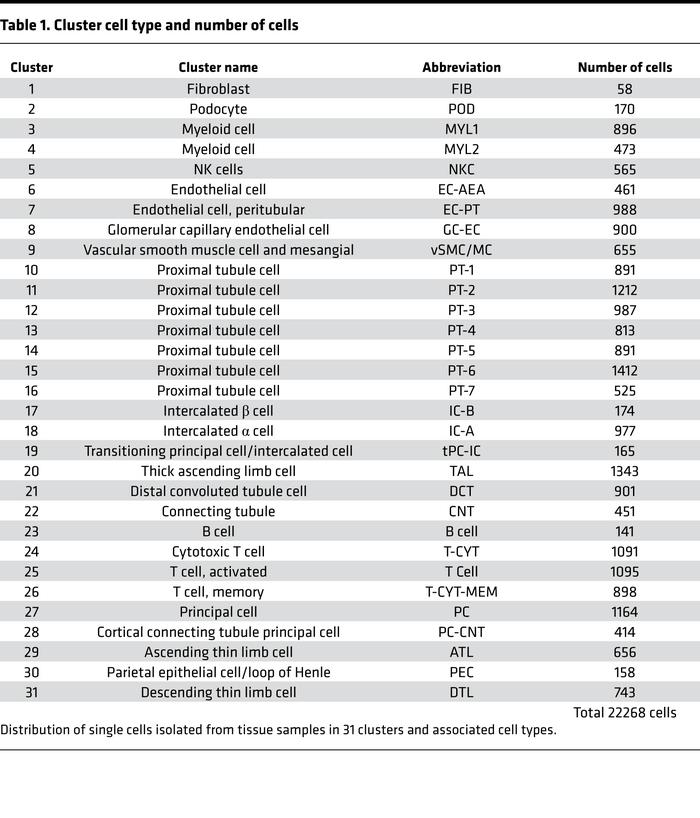

Finally, we reviewed the dot plots to again confirm all asignments were consistent with the original dot plot. 

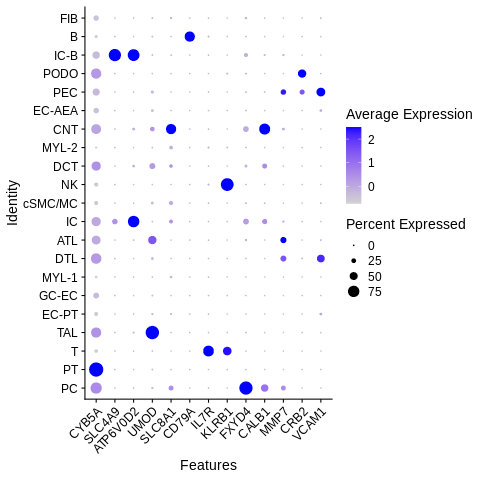

In [ ]:
%%R
DotPlot(sobj, features = c('CYB5A','SLC4A9','ATP6V0D2','UMOD','SLC8A1','CD79A','IL7R','KLRB1','FXYD4','CALB1','MMP7','CRB2','VCAM1')) + RotatedAxis()

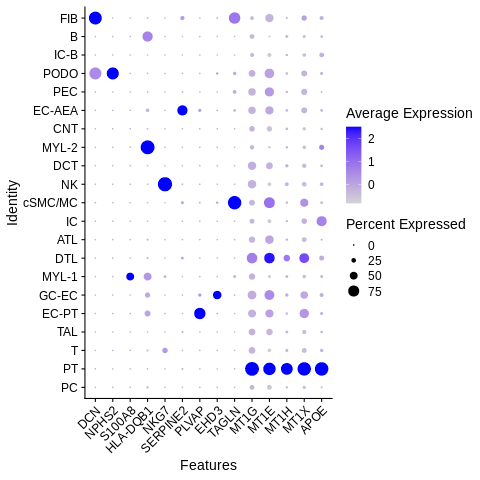

In [ ]:
%%R
DotPlot(sobj, features = c('DCN', 'NPHS2', 'S100A8', 'HLA-DQB1','NKG7','SERPINE2','PLVAP','EHD3','TAGLN', 'MT1G','MT1E','MT1H','MT1X','APOE','PDZ1IP1'
)) + RotatedAxis()

This concluded our replication of the data from Menon et al. which was then saved for integration with the other datasets. 

In [ ]:
%%R
save(sobj, file = '/content/drive/Shareddrives/Research - Stephen/Organized Files/Datasets/Menon/Seurat Object/menoncolab')

In [ ]:
%%R
DCTNames <- names(sobj$nCount_RNA)[Idents(sobj) == 'DCT']
saveRDS(DCTNames, file = 'names.RDS')